In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pandas as pd
from pandas.tools.plotting import table
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import os
import csv
import requests
import json
import gmaps

# Google developer API key
from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

url = "http://data.nba.net/10s/prod/v1/2016/players.json"

In [2]:
# Files to Load
player_data_to_load = os.path.join("player_data_cleaned.csv")
seasons_data_to_load = os.path.join("Seasons_stats.csv")
# Inspect budget data from U.S. Department of Education 2010-2017 https://ope.ed.gov/athletics/#/datafile/list
budgets_2010_data_to_load = os.path.join("budgets/","EADA2010.csv")
budgets_2011_data_to_load = os.path.join("budgets/","EADA2011.csv")
budgets_2012_data_to_load = os.path.join("budgets/","EADA2012.csv")
budgets_2013_data_to_load = os.path.join("budgets/","EADA2013.csv")
budgets_2014_data_to_load = os.path.join("budgets/","EADA2014.csv")
budgets_2015_data_to_load = os.path.join("budgets/","EADA2015.csv")
budgets_2016_data_to_load = os.path.join("budgets/","EADA2016.csv")
budgets_2017_data_to_load = os.path.join("budgets/","EADA2017.csv")

# Read the Player and Season Data
player_data_df = pd.read_csv(player_data_to_load, encoding="UTF-8")
seasons_data_df = pd.read_csv(seasons_data_to_load, encoding="UTF-8")

# Read the Budget Data From 2008-2017; reduce 4200+ columns to 17
budget2010_data_df = pd.read_csv(budgets_2010_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 10, 15, 26, 50, 143, 152, 158, 168, 316, 390, 427, 945, 3609, 3942])
budget2011_data_df = pd.read_csv(budgets_2011_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 10, 15, 26, 50, 143, 152, 158, 168, 316, 390, 427, 945, 3609, 3942])
budget2012_data_df = pd.read_csv(budgets_2012_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 10, 15, 26, 50, 143, 152, 158, 168, 316, 390, 427, 945, 3609, 3942])
budget2013_data_df = pd.read_csv(budgets_2013_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 10, 15, 26, 50, 143, 152, 158, 168, 316, 390, 427, 945, 3609, 3942])
budget2014_data_df = pd.read_csv(budgets_2014_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 10, 15, 26, 50, 143, 152, 158, 168, 316, 390, 427, 945, 3609, 3942])
budget2015_data_df = pd.read_csv(budgets_2015_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 10, 15, 26, 50, 143, 152, 158, 168, 316, 390, 427, 945, 3609, 3942])
budget2016_data_df = pd.read_csv(budgets_2016_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 10, 15, 26, 50, 143, 152, 158, 168, 316, 390, 427, 945, 3609, 3942])
budget2017_data_df = pd.read_csv(budgets_2017_data_to_load, encoding="UTF-8", usecols=[1, 4, 8, 10, 15, 26, 50, 143, 152, 158, 168, 316, 390, 427, 945, 3609, 3942])

# Save the data table for preview
#budget2010_data_df.to_csv("budget2010_data_df.csv")
#budget2011_data_df.to_csv("budget2011_data_df.csv")
#budget2012_data_df.to_csv("budget2012_data_df.csv")
#budget2013_data_df.to_csv("budget2013_data_df.csv")
#budget2014_data_df.to_csv("budget2014_data_df.csv")
#budget2015_data_df.to_csv("budget2015_data_df.csv")
#budget2016_data_df.to_csv("budget2016_data_df.csv")
#budget2017_data_df.to_csv("budget2017_data_df.csv")

In [3]:
#cleaned up
#University of California, Los Angeles	University of California-Los Angeles#
#University of North Carolina	University of North Carolina at Chapel Hill
#Indiana University	Indiana University-Bloomington
#St. John's University	St. John's University-New York
#University of Michigan	University of Michigan-Ann Arbor
#Ohio State University	Ohio State University-Main Campus
#North Carolina State University	North Carolina State University at Raleigh
#University of Minnesota	University of Minnesota-Twin Cities
#University of Maryland	University of Maryland-College Park
#Louisiana State University	Louisiana State University and Agricultural & Mechanical College
#Georgia Institute of Technology	Georgia Institute of Technology-Main Campus
#University of Nevada, Las Vegas	University of Nevada-Las Vegas

In [4]:
# Inspect budget data from U.S. Department of Education 2017 https://ope.ed.gov/athletics/#/datafile/list
#budget2017_data_df.head()

In [5]:
#budget2017_data_df.count()

In [6]:
#Merge budget data in steps
#1 - all imported together in pairs
budget_data_merged_1 = pd.merge(budget2010_data_df, budget2011_data_df, on="institution_name", suffixes=['_2010','_2011'], how="left")
budget_data_merged_2 = pd.merge(budget2012_data_df, budget2013_data_df, on="institution_name", suffixes=['_2012','_2013'], how="left")
budget_data_merged_3 = pd.merge(budget2014_data_df, budget2015_data_df, on="institution_name", suffixes=['_2014','_2015'], how="left")
budget_data_merged_4 = pd.merge(budget2016_data_df, budget2017_data_df, on="institution_name", suffixes=['_2016','_2017'], how="left")

#2 - pairs merged agains
budget_data_merged_6 = pd.merge(budget_data_merged_1, budget_data_merged_2, on="institution_name", how="left")
budget_data_merged_7 = pd.merge(budget_data_merged_3, budget_data_merged_4, on="institution_name", how="left")

#3 - final merge
budget_data_merged_total = pd.merge(budget_data_merged_6, budget_data_merged_7, on="institution_name", how="left")

budget_data_merged_total.to_csv("budget_data_merged_total.csv")

In [7]:
# Add total columns for head coach salary, expenses, and revenues
budget_data_merged_total_summed = budget_data_merged_total.copy()
budget_data_merged_total_summed['Total_StudentAid'] = budget_data_merged_total['STUDENTAID_MEN_2010'] + budget_data_merged_total['STUDENTAID_MEN_2011'] + budget_data_merged_total['STUDENTAID_MEN_2012'] + budget_data_merged_total['STUDENTAID_MEN_2013'] + budget_data_merged_total['STUDENTAID_MEN_2014'] + budget_data_merged_total['STUDENTAID_MEN_2015'] + budget_data_merged_total['STUDENTAID_MEN_2016'] + budget_data_merged_total['STUDENTAID_MEN_2017']
budget_data_merged_total_summed['Total_HeadCoachSalary'] = budget_data_merged_total['HDCOACH_SALARY_MEN_2010'] + budget_data_merged_total['HDCOACH_SALARY_MEN_2011'] + budget_data_merged_total['HDCOACH_SALARY_MEN_2012'] + budget_data_merged_total['HDCOACH_SALARY_MEN_2013'] + budget_data_merged_total['HDCOACH_SALARY_MEN_2014'] + budget_data_merged_total['HDCOACH_SALARY_MEN_2015'] + budget_data_merged_total['HDCOACH_SALARY_MEN_2016'] + budget_data_merged_total['HDCOACH_SALARY_MEN_2017']
budget_data_merged_total_summed['Total_Revenue'] = budget_data_merged_total['REV_MEN_Bskball_2010'] + budget_data_merged_total['REV_MEN_Bskball_2011'] + budget_data_merged_total['REV_MEN_Bskball_2012'] + budget_data_merged_total['REV_MEN_Bskball_2013'] + budget_data_merged_total['REV_MEN_Bskball_2014'] + budget_data_merged_total['REV_MEN_Bskball_2015'] + budget_data_merged_total['EXP_MEN_Bskball_2016'] + budget_data_merged_total['EXP_MEN_Bskball_2017']
budget_data_merged_total_summed['Total_Expense'] = budget_data_merged_total['EXP_MEN_Bskball_2010'] + budget_data_merged_total['EXP_MEN_Bskball_2011'] + budget_data_merged_total['EXP_MEN_Bskball_2012'] + budget_data_merged_total['EXP_MEN_Bskball_2013'] + budget_data_merged_total['EXP_MEN_Bskball_2014'] + budget_data_merged_total['EXP_MEN_Bskball_2015'] + budget_data_merged_total['REV_MEN_Bskball_2016'] + budget_data_merged_total['REV_MEN_Bskball_2017']
#budget_data_merged_total_summed.head()
#budget_data_merged_total_summed.to_csv("budget_data_merged_total_summed.csv")

In [8]:
truncatedBudget_df = revenue_df = budget_data_merged_total_summed[['institution_name','Total_Revenue','Total_Expense']].copy()
#truncatedBudget_df

In [9]:
#truncatedBudget_df.to_csv("truncatedBudget_df.csv")

In [10]:
top25_df = budget_data_merged_total_summed[['institution_name','Total_StudentAid','Total_HeadCoachSalary','Total_Expense','Total_Revenue']].rename(columns={'Total_StudentAid':'Total Student Aid','Total_HeadCoachSalary':'Total Head Coach Salary','Total_Expense':'Total Expense','Total_Revenue':'Total Revenue'}).copy()
top25_df = top25_df.sort_values(by='Total Expense', ascending=False)
top25_df = top25_df.reset_index(drop=True).head(25)
#top25_df.head()

In [11]:
#df3 = df[(df['count'] == '2')
topSchool_df = budget_data_merged_total_summed.set_index("institution_name")
topSchool_df = topSchool_df.loc[['University of Kentucky']]
#topSchool_df.to_csv("topSchool_df.csv")
topSchool_df = topSchool_df.reset_index(drop=True)
#topSchool_df

In [12]:
topSchool_Coach_df = topSchool_df[['HDCOACH_SALARY_MEN_2010','HDCOACH_SALARY_MEN_2011','HDCOACH_SALARY_MEN_2012','HDCOACH_SALARY_MEN_2013','HDCOACH_SALARY_MEN_2014','HDCOACH_SALARY_MEN_2015','HDCOACH_SALARY_MEN_2016','HDCOACH_SALARY_MEN_2017']].rename(columns={'HDCOACH_SALARY_MEN_2010':'2010','HDCOACH_SALARY_MEN_2011':'2011','HDCOACH_SALARY_MEN_2012':'2012','HDCOACH_SALARY_MEN_2013':'2013','HDCOACH_SALARY_MEN_2014':'2014','HDCOACH_SALARY_MEN_2015':'2015','HDCOACH_SALARY_MEN_2016':'2016','HDCOACH_SALARY_MEN_2017':'2017'}).copy()
#topSchool_Coach_df

In [13]:
topSchool_Revenue_df = topSchool_df[['REV_MEN_Bskball_2010','REV_MEN_Bskball_2011','REV_MEN_Bskball_2012','REV_MEN_Bskball_2013','REV_MEN_Bskball_2014','REV_MEN_Bskball_2015','REV_MEN_Bskball_2016','REV_MEN_Bskball_2017']].rename(columns={'REV_MEN_Bskball_2010':'2010','REV_MEN_Bskball_2011':'2011','REV_MEN_Bskball_2012':'2012','REV_MEN_Bskball_2013':'2013','REV_MEN_Bskball_2014':'2014','REV_MEN_Bskball_2015':'2015','REV_MEN_Bskball_2016':'2016','REV_MEN_Bskball_2017':'2017'}).copy()
#topSchool_Revenue_df.reset_index()
#topSchool_Revenue_df

In [14]:
topSchool_Revenue_df = topSchool_Revenue_df.T
#topSchool_Revenue_df

In [15]:
topSchool_Expense_df = topSchool_df[['EXP_MEN_Bskball_2010','EXP_MEN_Bskball_2011','EXP_MEN_Bskball_2012','EXP_MEN_Bskball_2013','EXP_MEN_Bskball_2014','EXP_MEN_Bskball_2015','EXP_MEN_Bskball_2016','EXP_MEN_Bskball_2017']].rename(columns={'EXP_MEN_Bskball_2010':'2010','EXP_MEN_Bskball_2011':'2011','EXP_MEN_Bskball_2012':'2012','EXP_MEN_Bskball_2013':'2013','EXP_MEN_Bskball_2014':'2014','EXP_MEN_Bskball_2015':'2015','EXP_MEN_Bskball_2016':'2016','EXP_MEN_Bskball_2017':'2017'}).copy()
#topSchool_Expense_df.reset_index()
#topSchool_Expense_df

In [16]:
topSchool_Coach_df = topSchool_Coach_df.T
#topSchool_Coach_df

No handles with labels found to put in legend.


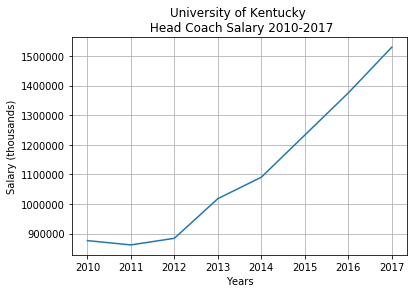

In [17]:
x_axis = topSchool_Coach_df.index

plt.plot(x_axis, topSchool_Coach_df)
plt.title("University of Kentucky \n Head Coach Salary 2010-2017")
plt.ylabel("Salary (thousands)")
plt.xlabel("Years")

plt.grid()
plt.legend().set_visible(False)
figCoach = plt.gcf()
plt.show()

In [18]:
figCoach.savefig('images/Kentucky_Coach_Salary.png', dpi=100, bbox_inches="tight")

No handles with labels found to put in legend.


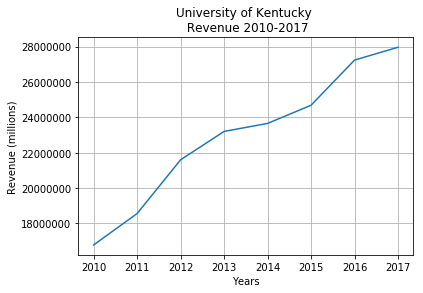

In [19]:
x_axis2 = topSchool_Revenue_df.index

plt.plot(x_axis2, topSchool_Revenue_df)
plt.title("University of Kentucky \n Revenue 2010-2017")
plt.ylabel("Revenue (millions)")
plt.xlabel("Years")
plt.ticklabel_format(style='sci', scilimits=(0, 17000000), axis='y')
plt.grid()
plt.legend().set_visible(False)
figRevenue = plt.gcf()
plt.show()

In [20]:
figRevenue.savefig('images/Kentucky_Revenue.png', dpi=100, bbox_inches="tight")

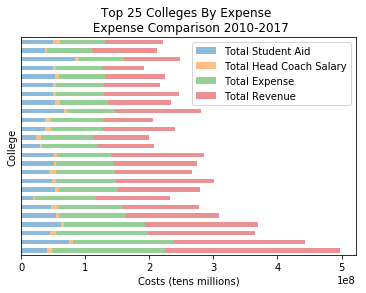

In [21]:
people = top25_df['institution_name']
top25_df.plot.barh(stacked=True,alpha=0.5)
plt.title("Top 25 Colleges By Expense \n Expense Comparison 2010-2017")
plt.ylabel("College")
plt.xlabel("Costs (tens millions)")

#plt.xticks([])
plt.yticks([])
comparison = plt.gcf()
plt.show()

In [22]:
comparison.savefig('images/top25comparison.png', dpi=100, bbox_inches="tight")

In [23]:
studentAid_df = budget_data_merged_total_summed[['Total_StudentAid','Total_Expense']].copy()
studentAid_df = studentAid_df.sort_values(by='Total_Expense', ascending=False)
studentAid_df = studentAid_df.reset_index(drop=True).head(25)
studentAid_df = studentAid_df.rename(columns={'Total_StudentAid':'Total Student Aid','Total_Expense':'Total Expense'})
#studentAid_df.head()

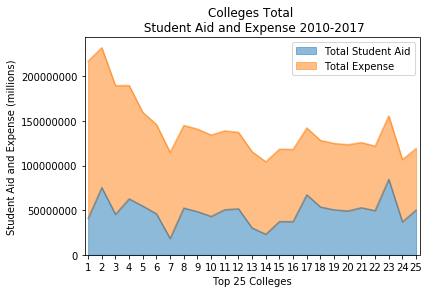

In [24]:
# plot
plot = studentAid_df.plot.area(alpha=0.5)
figAll = plot.get_figure()
plt.title("Colleges Total \n Student Aid and Expense 2010-2017")
plt.xlabel("Top 25 Colleges")
plt.ylabel("Student Aid and Expense (millions)")
plt.xticks(range(len(studentAid_df.index + 1)),studentAid_df.index + 1)
plt.ticklabel_format(style='sci', scilimits=(0, 18000000), axis='y')
#plt.ylim(0, 5.5)
plt.xlim(-.25, 24.25)
studentAid = plt.gcf()

In [25]:
studentAid.savefig('images/top25StudentAid.png', dpi=100, bbox_inches="tight")

In [26]:
coachSalary_df = budget_data_merged_total_summed[['institution_name','Total_HeadCoachSalary','Total_Expense']].copy()
coachSalary_df = coachSalary_df.sort_values(by='Total_Expense', ascending=False)
coachSalary_df = coachSalary_df.reset_index(drop=True).head(25)
#coachSalary_df.head()

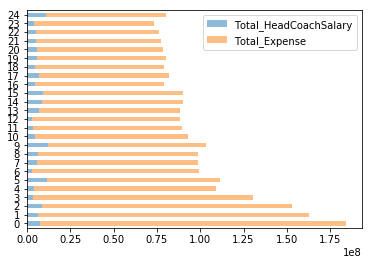

In [27]:
y_pos = np.arange(len(coachSalary_df['institution_name']))
salary = coachSalary_df['Total_HeadCoachSalary']
expense = coachSalary_df['Total_Expense']

coachSalary_df.plot.barh(stacked=True,alpha=0.5)

#plt.barh(y_pos,salary, color="red", stacked=True)
#plt.barh(y_pos,expense, color="blue", stacked=True)
plt.show()

(-0.25, 24.25)

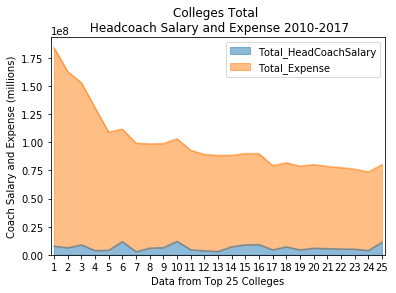

In [28]:
# plot
plot = coachSalary_df.plot.area(alpha=0.5)
figAll = plot.get_figure()
plt.title("Colleges Total \n Headcoach Salary and Expense 2010-2017")
plt.xlabel("Data from Top 25 Colleges")
plt.ylabel("Coach Salary and Expense (millions)")
plt.xticks(range(len(coachSalary_df.index + 1)),coachSalary_df.index + 1)
#plt.ylim(0, 5.5)
plt.xlim(-.25, 24.25)

In [29]:
revenue_df = budget_data_merged_total_summed[['institution_name','Total_Revenue','Total_Expense']].copy()
revenue_df = revenue_df.sort_values(by='Total_Expense', ascending=False)
revenue_df = revenue_df.reset_index(drop=True).head(25)
#revenue_df.head()

In [30]:
revenue_df_noInst = revenue_df[['Total_Expense','Total_Revenue']].copy()
#revenue_df_noInst.head()

(-0.25, 24.25)

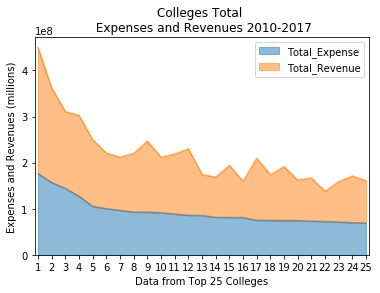

In [31]:
# plot
plot = revenue_df_noInst.plot.area(alpha=0.5)
figexpense = plot.get_figure()
plt.title("Colleges Total \n Expenses and Revenues 2010-2017")
plt.xlabel("Data from Top 25 Colleges")
plt.ylabel("Expenses and Revenues (millions)")
plt.xticks(range(len(revenue_df_noInst.index + 2)),revenue_df_noInst.index + 1)
#plt.ylim(0, 5.5)
plt.xlim(-.25, 24.25)

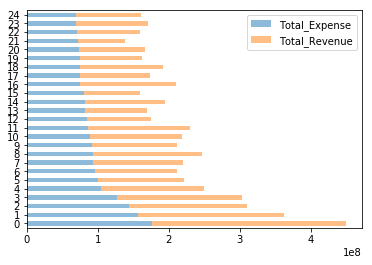

In [32]:
revenue_df_noInst.plot.barh(alpha=0.5, stacked=True)

In [33]:
#Gather variables
#Number of unique colleges
unique_college = player_data_df['college'].nunique()

#Group colleges to count players
playerGrouped = player_data_df.groupby('college').count()
countByCollege = player_data_df.groupby(['college'], as_index=False).agg({'name':'count'}).rename(columns={'name':'count'})

#singleCollege = countByCollege.groupby('count').size()
singleCollege = countByCollege.loc[countByCollege['count'] == 1]
singleCollege_sum = singleCollege['college'].count()

#College Mode
modeCollege_df = countByCollege['count'].sort_values(ascending=False)
modeCollege_df = modeCollege_df.reset_index(drop=True)
modeCollege = modeCollege_df.mode()
modeCollege = modeCollege.iloc[0]
modeCollege

#Earliest start year
minStartyear = player_data_df['year_start'].min()

#Latest start year
latestStartyear = player_data_df['year_start'].max()

#Number of unique players
unique_player = player_data_df['name'].nunique()

#Copy player dataframe
playerYears_df = player_data_df[['year_start','birth_date']].copy()

#Birth year
playerYears_df['birth_date'] = pd.to_datetime(playerYears_df['birth_date']).dt.year

playerYears_df.head()
playerYears_df['entryAge'] = playerYears_df['year_start'] - playerYears_df['birth_date']

averageStartage = playerYears_df['entryAge'].mean()
averageStartage = np.round(averageStartage, decimals=2)

#ageYeargroup = playerYears_df.groupby('year_start')
ageYeargroup = playerYears_df.groupby(['year_start'], as_index=False).agg({'entryAge':'mean'}).rename(columns={'entryAge':'AverAge'})

firstYearAverageAge = ageYeargroup.iloc[0]['AverAge']
firstYearAverageAge = np.round(firstYearAverageAge, decimals=2)

currentYearAverageAge = ageYeargroup.iloc[-1]['AverAge']
currentYearAverageAge = np.round(currentYearAverageAge, decimals=2)

maxExpense = revenue_df_noInst['Total_Expense'].max()
minExpense = revenue_df_noInst['Total_Expense'].min()
#print(f"The max expense is {maxExpense} and the min is {minExpense}")

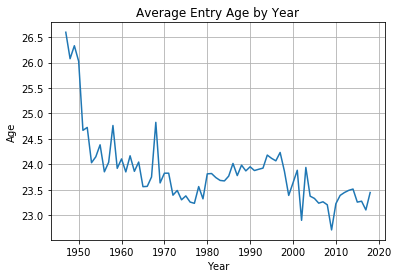

In [34]:
year_strt = ageYeargroup['year_start']
AverAge = ageYeargroup['AverAge']
plt.title("Average Entry Age by Year")
plt.xlabel("Year")
plt.ylabel("Age")
plt.grid()
plt.plot(year_strt, AverAge)
age = plt.gcf()
plt.show()

In [35]:
#plt.show()
#plt.draw()
age.savefig('images/average_age.png', dpi=100)
#plt.savefig('average_age.png', dpi=100)

In [36]:
playerGrouped = player_data_df.groupby('college').count()
countByCollege = player_data_df.groupby(['college'], as_index=False).agg({'name':'count'}).rename(columns={'name':'count'})
#countByCollege.head()

In [37]:
top25colleges = countByCollege.sort_values(by = 'count', ascending=False).head(25)
top25colleges = top25colleges.reset_index(drop=True)
#top25colleges.head()

<BarContainer object of 25 artists>

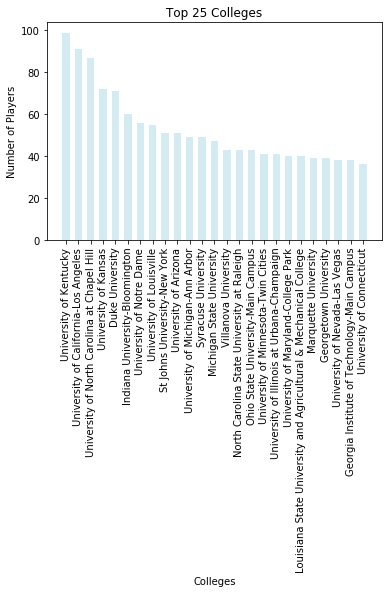

In [38]:
bar25colleges = top25colleges['college']
bar25count = top25colleges['count']
width = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125]

plt.title("Top 25 Colleges")
plt.xlabel("Colleges")
plt.ylabel("Number of Players")
plt.xticks(rotation=90)
top25colleges['college']

fig2 = plt.gcf()
plt.xticks(width, bar25colleges)
plt.bar(width, bar25count, color='lightblue', alpha=0.5, align="center", width=3)

In [39]:
#fig2.savefig('top25colleges.png', dpi=100)

In [40]:
#top25colleges
#truncatedBudget_df
top25_budget_merged = pd.merge(top25colleges, truncatedBudget_df, how="left", left_on="college", right_on="institution_name")

top25_budget_merged = top25_budget_merged[['institution_name', 'Total_Expense','Total_Revenue']].rename(columns={'Total_Expense':'Total Expense','Total_Revenue':'Total Revenue'}).copy()
#top25_budget_merged.set_index('institution_name', inplace=True)
top25_budget_merged.head()

,institution_name,Total Expense,Total Revenue
0,University of Kentucky,144133449.0,166569620.0
1,University of California-Los Angeles,74282397.0,88005440.0
2,University of North Carolina at Chapel Hill,85624904.0,144504936.0
3,University of Kansas,100002548.0,120665973.0
4,Duke University,156658579.0,205155916.0


In [41]:
#top25_budget_merged.dtypes

In [42]:
#top25_budget_merged.to_csv("top25_budget_merged.csv")

In [43]:
top25_budget_merged_round = top25_budget_merged['Total Expense'] / 1000
#top25_budget_merged_round

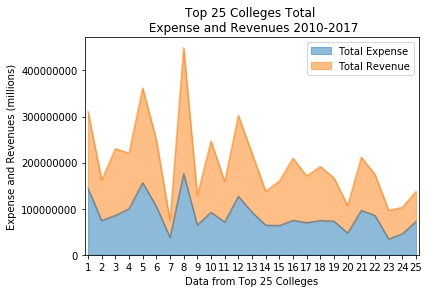

In [44]:
# plot
#pd.options.display.float_format = '{:.,}'.format
plot = top25_budget_merged.plot.area(alpha=0.5)
figexpense = plot.get_figure()
plt.title("Top 25 Colleges Total \n Expense and Revenues 2010-2017")
plt.xlabel("Data from Top 25 Colleges")
plt.ylabel("Expense and Revenues (millions)")
plt.xticks(range(len(top25_budget_merged.index + 1)),top25_budget_merged.index + 1)
plt.ticklabel_format(style='sci', scilimits=(0, 300000000), axis='y')
#plt.ticklabel_format(useOffset=False, axis='y')
#plt.ylim(0, 5*1e8)
plt.xlim(-.25, 24.25)
areaExpense = plt.gcf()

In [45]:
areaExpense.savefig('images/top25areaExpense.png', dpi=100, bbox_inches="tight")

In [46]:
top25colleges["Lat"] = ""
top25colleges["Lng"] = ""
#top25colleges

In [47]:
# create a params dict that will be updated with new city each iteration
params2 = {"key": gkey}

# Loop through the cities_pd and run a lat/long search for each city
for index, row in top25colleges.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"

    city = row['college']

    # update address key value
    params2['address'] = city

    # make request
    cities_lat_lng = requests.get(base_url, params=params2)
    
    # print the cities_lat_lng url, avoid doing for public github repos in order to avoid exposing key
    # print(cities_lat_lng.url)
    
    # convert to json
    cities_lat_lng = cities_lat_lng.json()

    top25colleges.loc[index, "Lat"] = cities_lat_lng["results"][0]["geometry"]["location"]["lat"]
    top25colleges.loc[index, "Lng"] = cities_lat_lng["results"][0]["geometry"]["location"]["lng"]

# Visualize to confirm lat lng appear
top25colleges.head()

,college,count,Lat,Lng
0,University of Kentucky,99,38.0307,-84.504
1,University of California-Los Angeles,91,34.0689,-118.445
2,University of North Carolina at Chapel Hill,87,35.9049,-79.0469
3,University of Kansas,72,38.9543,-95.2558
4,Duke University,71,36.0014,-78.9382


In [48]:
#top25colleges.to_csv("output-latlong-25.csv")

In [49]:
# Store latitude and longitude in locations
locations = top25colleges[["Lat", "Lng"]]

# Fill NaN values and convert to float
count = top25colleges["count"].astype(float)

In [50]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=count, 
                                 dissipating=False, max_intensity=100,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [51]:
print("The data consisted of two .csvs: one that had player data and one that had seasons.")
print(f"The player data had {unique_player} players that came from {unique_college} unique colleges. The NBA start years ranged from {minStartyear} to {latestStartyear}. The average age of the players entering the NBA over that time is {averageStartage}, though the average age has come down from {firstYearAverageAge} to {currentYearAverageAge} this year. One tidbit: the mode of the player count by college is {modeCollege}, which makes sense because {singleCollege_sum} of the colleges only sent one player to the NBA! ")

The data consisted of two .csvs: one that had player data and one that had seasons.
The player data had 4500 players that came from 473 unique colleges. The NBA start years ranged from 1947 to 2018. The average age of the players entering the NBA over that time is 23.93, though the average age has come down from 26.59 to 23.44 this year. One tidbit: the mode of the player count by college is 1, which makes sense because 171 of the colleges only sent one player to the NBA! 


In [52]:
players = pd.read_csv('player_data.csv')
seasons = pd.read_csv('Seasons_stats.csv')
p = players.groupby('college').count()
playerByCollege = p.sort_values(by = 'name', ascending=False)
top20 = playerByCollege['name'].head(20)

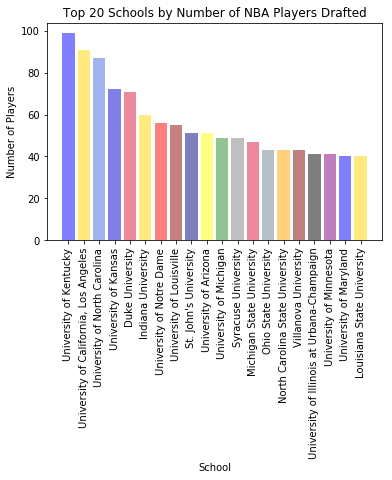

/Users/ken_r/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:34: FutureWarning: 'pandas.tools.plotting.table' is deprecated, import 'pandas.plotting.table' instead.


college
University of Kentucky                   99
University of California, Los Angeles    91
University of North Carolina             87
University of Kansas                     72
Duke University                          71
Name: name, dtype: int64

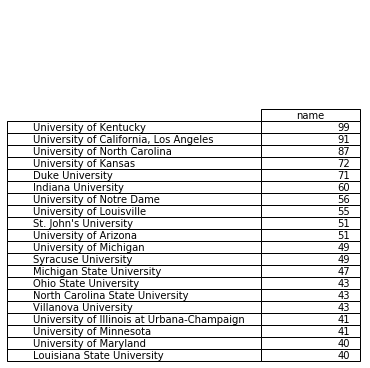

In [53]:
y_pos = np.arange(20)
plt.xticks(y_pos, top20.index)
plt.xlabel('School')
plt.ylabel('Number of Players')
plt.title('Top 20 Schools by Number of NBA Players Drafted')
plt.bar(y_pos, top20, align='center', alpha=0.5,
        color = ['blue',
                 'gold',
                 'royalblue',
                 'mediumblue',
                 'crimson',
                 'gold',
                 'red',
                 'darkred',
                 'navy',
                 'yellow',
                 'forestgreen',
                 'grey',
                 'crimson',
                 'slategrey',
                 'orange',
                 'maroon',
                 'black',
                 'purple'])
plt.xticks(rotation=90)
plt.savefig('images/Top 20 Schools by Number of NBA Players Drafted', dpi = 100, bbox_inches='tight')
plt.show()


ax = plt.subplot(235, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, top20)  # where df is your data frame

plt.savefig('images/top20school.png', dpi = 100, bbox_inches='tight')
top20.head()

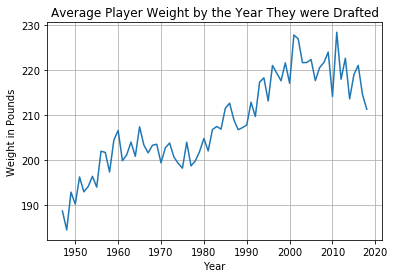

In [54]:
p = players.groupby('year_start').mean()
weightByYear = p['weight']
plt.plot(weightByYear.index, weightByYear)
plt.grid()
plt.xlabel('Year')
plt.ylabel('Weight in Pounds')
plt.title('Average Player Weight by the Year They were Drafted')
plt.savefig('images/Average Player Weight by the Year They were Drafted', dpi = 100, bbox_inches='tight')

In [55]:
s =seasons.groupby(['Player', 'Year']).mean()

players[["feet","inches"]]=players["height"].str.split('-',expand=True)
players["feet"] = pd.to_numeric(players["feet"])
players["inches"] = pd.to_numeric(players["inches"])
players['feet'] = players['feet']*12
players["total_height"] = players["feet"] + players["inches"]


ps = seasons.join(players.set_index('name'), on='Player')

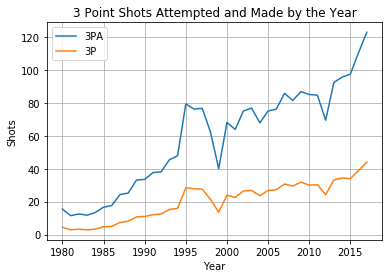

In [56]:
s =seasons.groupby('Year').mean()
ps = seasons.join(players.set_index('name'), on='Player')

psTall = ps.loc[ps['total_height'] >= 81].groupby('Year').mean()

threeA = s['3PA']
threeM = s['3P']
threeP = s['3P%']

threeAtall = psTall['3PA']
threeMtall = psTall['3P']
threePtall = psTall['3P%']

plt.plot(threeA.index, threeA)
plt.plot(threeM.index, threeM)

plt.grid()
plt.legend()

plt.title('3 Point Shots Attempted and Made by the Year')
plt.xlabel('Year')
plt.ylabel('Shots')

plt.savefig('images/3 Point Shots Attempted and Made by the Year', dpi = 100, bbox_inches='tight')

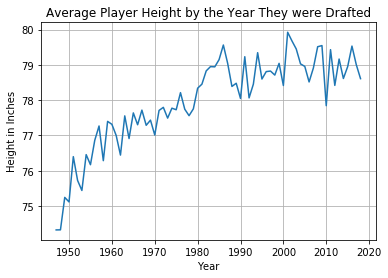

In [57]:
p = players.groupby('year_start').mean()
heightByYear = p['total_height']

short = players.sort_values(by = 'total_height', ascending = True).head(5)
tall = players.sort_values(by = 'total_height', ascending = False).head(5)



plt.grid()
plt.title('Average Player Height by the Year They were Drafted')
plt.xlabel('Year')
plt.ylabel('Height in Inches')

plt.plot(heightByYear.index,heightByYear)

plt.savefig('images/Average Player Height by the Year They were Drafted', dpi = 100, bbox_inches='tight')

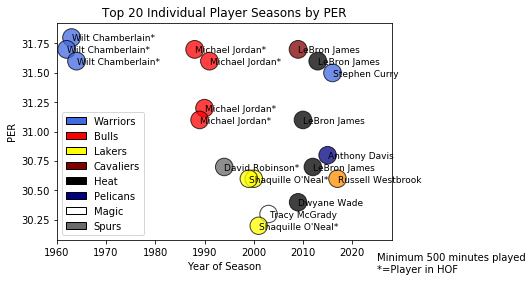

In [58]:
s = seasons.loc[seasons['MP'] >= 500,:]

s = s.groupby(by =['Player','Year']).mean()
s = s[['PER', '3P', 'MP','eFG%']]
playersByPER = s.sort_values(by = 'PER', ascending=False)
bestSeasons = playersByPER['PER'].head(20)

years = bestSeasons.index.get_level_values('Year')
players = bestSeasons.index.get_level_values('Player')

plt.title('Top 20 Individual Player Seasons by PER')
plt.ylabel('PER')
plt.xlabel('Year of Season')
plt.xlim(1960,2028)
plt.text(x=2025,y= 29.8,
         s='Minimum 500 minutes played\n*=Player in HOF')

leg_elts = [Patch(facecolor='royalblue', edgecolor='black',
                         label='Warriors'),
           Patch(facecolor='red', edgecolor='black',
                         label='Bulls'),
           Patch(facecolor='yellow', edgecolor='black',
                         label='Lakers'),
           Patch(facecolor='maroon', edgecolor='black',
                         label='Cavaliers'),
           Patch(facecolor='black', edgecolor='black',
                         label='Heat'),
           Patch(facecolor='navy', edgecolor='black',
                         label='Pelicans'),
           Patch(facecolor='white', edgecolor='black',
                         label='Magic'),
           Patch(facecolor='dimgrey', edgecolor='black',
                         label='Spurs')]
plt.legend(handles = leg_elts)


plt.scatter(years, bestSeasons, marker = 'o',
            facecolors= ['royalblue',
                'red',
                'maroon',
                'royalblue',
                'black',
                'red',
                'royalblue',
                'royalblue',
                'red',
                'red',
                'black',
                'navy',
                'black',
                'dimgrey',
                'darkorange',
                'yellow',
                'yellow',
                'black',
                'white',
                'yellow'], edgecolors="black",
            s=bestSeasons*10, alpha=0.75)


for i,type in enumerate(players):
    #removes one of the Shaquille O'Neal labels
    if i != 15:
        x = years[i]
        y = bestSeasons[i]
        plt.text(x+0.04, y-0.03, type, fontsize=9)

top20fig = plt.gcf()
plt.show()

top20fig.savefig('images/Top 20 Individual Player Seasons by PER', dpi = 100, bbox_inches='tight')

/Users/ken_r/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.table' is deprecated, import 'pandas.plotting.table' instead.
  """


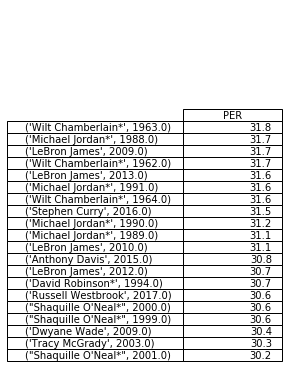

In [59]:
ax = plt.subplot(235, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, bestSeasons)  # where df is your data frame

plt.savefig('images/PERtable.png', dpi = 100, bbox_inches='tight')
plt.show()

In [60]:
#1. The mean duration of players in NBA for each school is in proportion to the total number of players in NBA for that school. 
#I am thinking to these findings on Gmap for each school.  
#Also I plot a scatter bubble chart, The bubble represents the mean duration of players in NBA for each school.



In [61]:
# Working steps:
#1. Pull in player data to get their mean duration in NBA for each school. 
#2. Using the same dataset, I will group the data by school and get the total number of players for each school.
#3. Plot the total number of players vs the mean duration of players for each school in Gmap
#4. Plot the scatter plot and add a trend line for each school to see there are any trends.

In [62]:
player_dataCsv = 'player_data_new.csv'
player_data_DF = pd.read_csv(player_dataCsv)

player_data_DF['duration'] = player_data_DF['year_end'] - player_data_DF['year_start'] 
player_data_DF.head()

player_data_DF_clean = player_data_DF[['college','name', 'duration']]
player_data_DF_gp = player_data_DF_clean.groupby('college')
player_data_summary = player_data_DF_gp[['duration']].mean()
player_data_summary = player_data_summary[player_data_summary['duration']> 0].reset_index().sort_values('college')
player_data_summary.head()

,college,duration
0,Alabama State University,1.00
1,Albany State University,8.60
2,Alcorn State University,6.25
3,American International College,10.00
4,American University,14.00


In [63]:
College_numberOfPlayer = player_data_DF_clean.groupby('college')[['name']].count().reset_index()
College_numberOfPlayer.head()

,college,name
0,Acadia University,1
1,Alabama - Huntsville,1
2,Alabama A&M University,1
3,Alabama State University,2
4,Albany State University,5


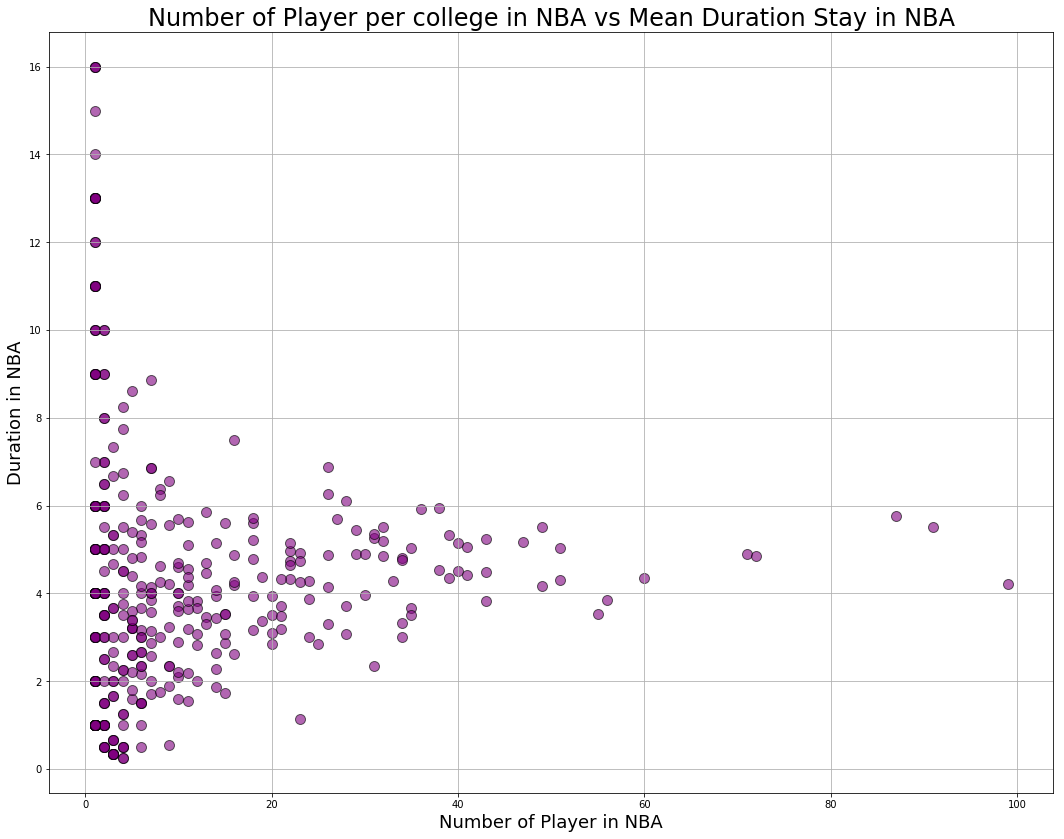

In [64]:
merge_player_college = pd.merge(player_data_summary, College_numberOfPlayer, how='inner',  on='college')

merge_player_college = merge_player_college.rename(columns={'name':'count of player'})
countOfPlayerlist = list(merge_player_college['count of player'])
durationList = list(merge_player_college['duration'])

#Plotting
plt.figure(figsize=(18,14))
plt.scatter(countOfPlayerlist, durationList, marker="o", s=100, facecolors="purple", edgecolors="black", alpha=0.60)
plt.xlabel('Number of Player in NBA',fontsize='18')

plt.ylabel('Duration in NBA', fontsize='18')
plt.title('Number of Player per college in NBA vs Mean Duration Stay in NBA', fontsize='24')
plt.grid()
plt.savefig("images/Player_count_vs_avg_stay_in_NBA.png")
plt.show()


In [65]:
# Need gkey to run this code

merge_player_college['lat'] = ""
merge_player_college['lng'] = ""

target_type = "university"

# set up a parameters dictionary
params3 = {
    "key": gkey,
    "type": target_type
    }



target_url= "https://maps.googleapis.com/maps/api/geocode/json"

for index, row in merge_player_college.iterrows():
    
    college=row['college']
    params3['address'] = college
        
    geo_data = requests.get(target_url, params= params3).json()
    merge_player_college.loc[index, 'lat'] = geo_data["results"][0]["geometry"]["location"]["lat"]
    merge_player_college.loc[index, 'lng'] = geo_data["results"][0]["geometry"]["location"]["lng"]
    
merge_player_college.head()



,college,duration,count of player,lat,lng
0,Alabama State University,1.00,2,32.3637,-86.2941
1,Albany State University,8.60,5,31.569,-84.1404
2,Alcorn State University,6.25,4,31.8742,-91.1373
3,American International College,10.00,1,42.1129,-72.5571
4,American University,14.00,1,38.9375,-77.0888


In [66]:
# Store latitude and longitude in locations
locations = merge_player_college[['lat','lng']]

duration = merge_player_college['duration'].astype(float)



# Plot Heatmap

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights = duration, dissipating=False, max_intensity=8, point_radius=.75)
fig.add_layer(heat_layer)


fig



Figure(layout=FigureLayout(height='420px'))

In [67]:
Seasons_Stats_file = 'Seasons_Stats.csv'
Seasons_Stats_DF = pd.read_csv(Seasons_Stats_file)
Seasons_Stats_DF.head()



,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


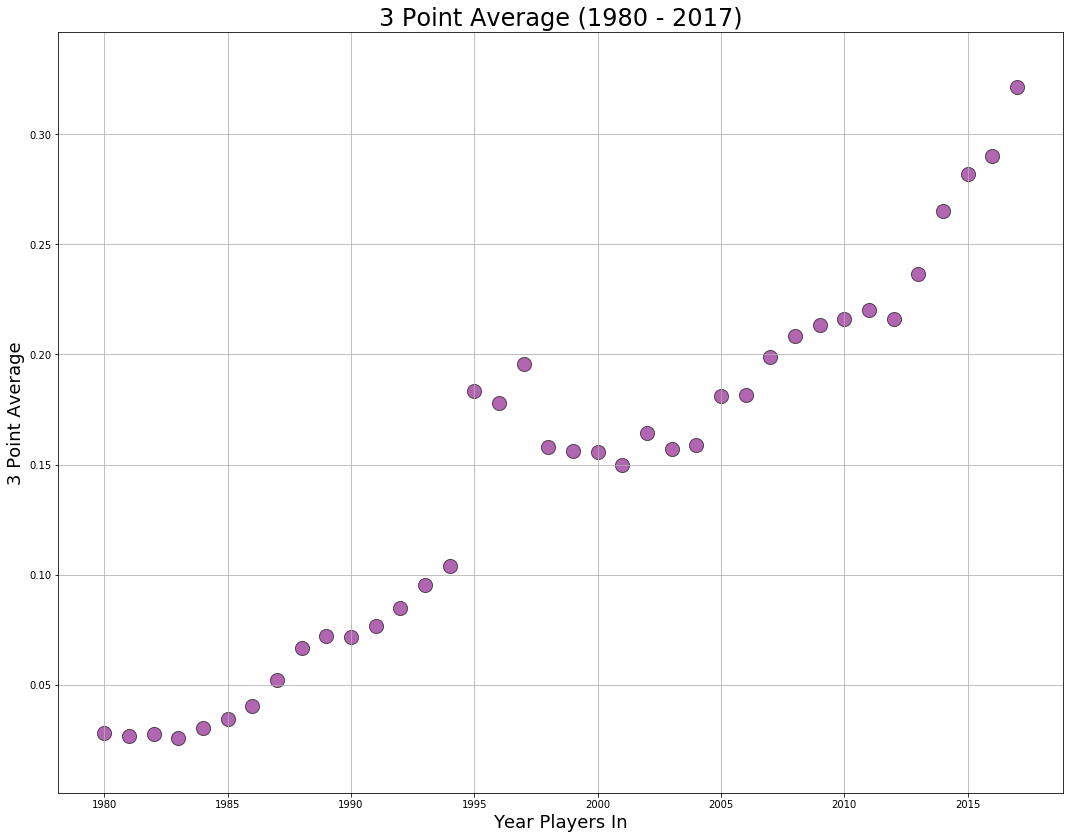

In [68]:
#setting up the data list for plotting

PAr = Seasons_Stats_DF.groupby(['Year'])['3PAr'].mean().dropna().reset_index()['3PAr']
list_3PAr = list(PAr)
Year = Seasons_Stats_DF.groupby(['Year'])['3PAr'].mean().dropna().reset_index()['Year']
listYear = list(Year)

#Plotting
plt.figure(figsize=(18,14))
plt.scatter(listYear, list_3PAr, marker="o", s=200, facecolors="purple", edgecolors="black", alpha=0.60)
plt.xlabel('Year Players In', fontsize=18)
plt.ylabel('3 Point Average', fontsize=18)

plt.title('3 Point Average (1980 - 2017)', fontsize=24)
plt.grid()
plt.savefig('images/ThreePointAv_overYear1980_2017.png')
plt.show()

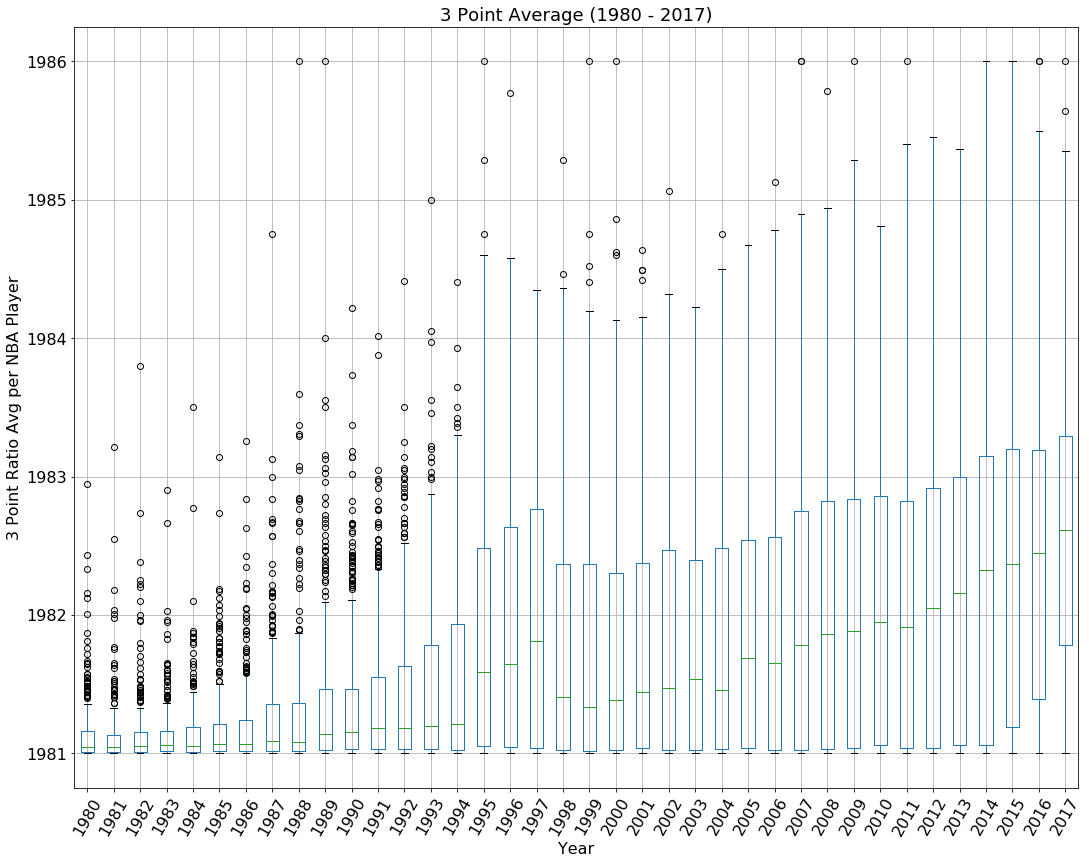

In [69]:
Year_3PAvr = Seasons_Stats_DF[Seasons_Stats_DF['Year'] >= 1980][['Year','Player','3PAr']]
df_Year_3PAvr = Year_3PAvr.groupby(['Player', 'Year'])[['3PAr']].mean()
new_df = df_Year_3PAvr.unstack()

# remove the '3PAr' level
new_df= new_df['3PAr']
labelobj = list(new_df.columns)
listlabel = [np.int(x) for x in labelobj]
x_axis = np.arange(0,len(listlabel),1)
# rename all column name removing trailing 0
new_df.columns= listlabel 

fig, ax= plt.subplots(figsize=(18,14))

ax.set_xticklabels(labelobj ,rotation='vertical', fontsize=16)
#ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.set_yticklabels(new_df, fontsize=16)
ax.set_title('3 Point Average (1980 - 2017)',  fontsize=18)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('3 Point Ratio Avg per NBA Player', fontsize=16)
#top_10.plot(ax=ax)
#plt.figure()
#plt.xticks(x_axis, listlabel, rotation='vertical')
#plt.xticks( listlabel,labelobj, rotation='vertical')

bp = new_df.boxplot(rot=60, ax=ax)
plt.savefig('images/BoxPlot_ThreePointAv_overYear1980_2017.png')




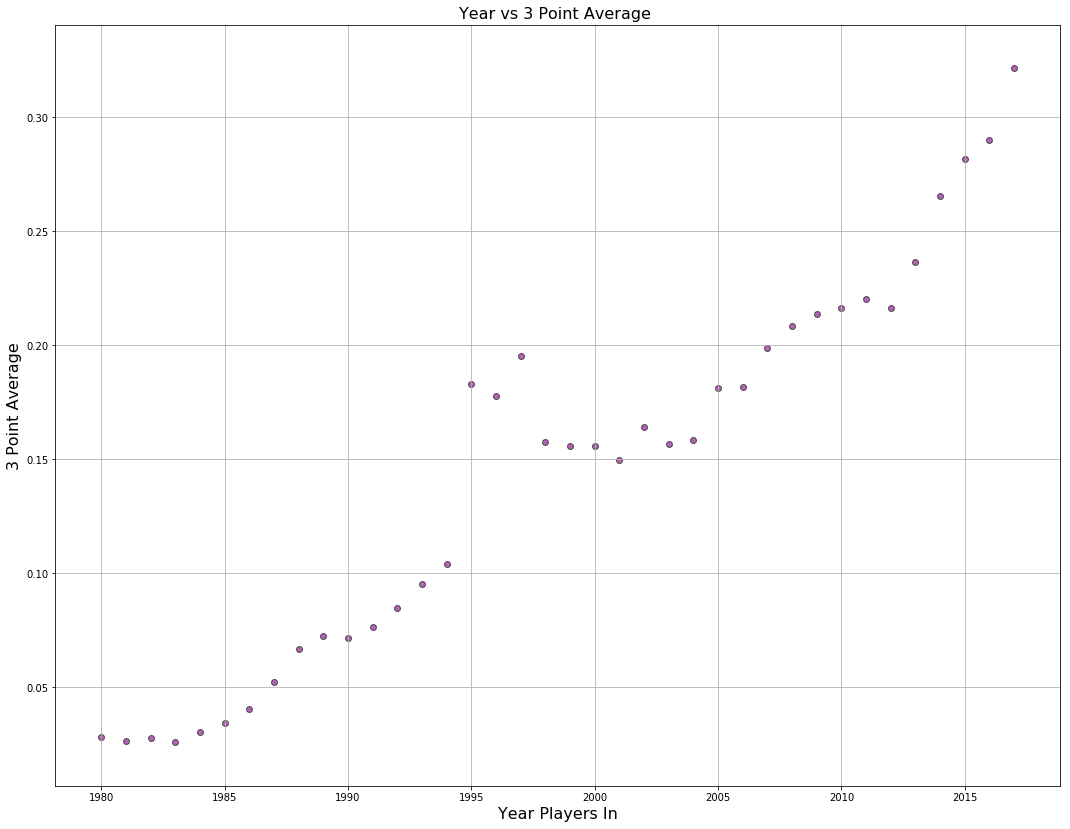

In [70]:

#setting up the data list for plotting

PAr = Seasons_Stats_DF.groupby(['Year'])['3PAr'].mean().dropna().reset_index()['3PAr']
list_3PAr = list(PAr)
Year = Seasons_Stats_DF.groupby(['Year'])['3PAr'].mean().dropna().reset_index()['Year']
listYear = list(Year)

#Plotting
plt.figure(figsize=(18,14))
plt.scatter(listYear, list_3PAr, marker="o", facecolors="purple", edgecolors="black", alpha=0.60)
plt.xlabel('Year Players In', fontsize = 16)
plt.ylabel('3 Point Average', fontsize = 16)

plt.title('Year vs 3 Point Average ', fontsize= 16)
plt.grid()


going to cite www.theringer.com/2016/11/7/16077036/nba-big-man-hybrids-karl-anthony-towns-myles-turner-254a304647c9

In [71]:
file = 'player_data.csv'
filetwo = 'Seasons_Stats.csv'

In [72]:
nba_df = pd.read_csv(file)
nbatwo_df = pd.read_csv(filetwo)
nbatwo_df["Pos"].unique()

array(['G-F', 'SG', 'SF', 'F', 'G', 'F-C', 'PG', 'F-G', 'C', 'PF', 'C-F',
       nan, 'PF-C', 'SF-SG', 'C-PF', 'SG-SF', 'PF-SF', 'SF-PF', 'SG-PG',
       'SF-PG', 'C-SF', 'PG-SG', 'PG-SF', 'SG-PF'], dtype=object)

In [73]:
nbatwo_df.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [74]:
nbatwoedit_df = nbatwo_df[["Year", "Player", "Pos", "Age", "Tm", "G", "GS", "MP", "PER", "TS%", "3PAr", "FTr", "ORB%", "DRB%", "TRB%",
                           "AST%", "STL%", "BLK%", "TOV%", "USG%", "OWS", "DWS", "WS", "WS/48", "OBPM", "DBPM", "BPM", "VORP", "FG", 
                           "FGA", "FG%", "3P", "3PA", "3P%", "2P", "2PA", "2P%", "eFG%", "FT", "FTA", "FT%", "ORB", "DRB", "TRB", 
                           "AST", "STL", "BLK", "TOV", "PF", "PTS"]]

In [75]:
#breaking data down into positions
only_bigmen = nbatwoedit_df.loc[(nbatwoedit_df["Pos"] =="C") | (nbatwoedit_df["Pos"] == "F-C") | (nbatwoedit_df["Pos"] == "C-F") | 
                               (nbatwoedit_df["Pos"] == "C-PF") | (nbatwoedit_df["Pos"] =="C-SF") | (nbatwoedit_df["Pos"] == "PF-C")|
                               (nbatwoedit_df["Pos"] == "PF-SF") | (nbatwoedit_df["Pos"]=="SF") | (nbatwoedit_df["Pos"]=="F")|
                               (nbatwoedit_df["Pos"] =="PF") | (nbatwoedit_df["Pos"]=="SF-PF")]
only_shorties = nbatwoedit_df.loc[(nbatwoedit_df["Pos"] =="SG") | (nbatwoedit_df["Pos"] == "G") | (nbatwoedit_df["Pos"] == "PG") | 
                               (nbatwoedit_df["Pos"] == "SG-SF") | (nbatwoedit_df["Pos"] =="PG-SF") | (nbatwoedit_df["Pos"] == "SG-PG")|
                               (nbatwoedit_df["Pos"] == "G-F") | (nbatwoedit_df["Pos"]=="F-G") | (nbatwoedit_df["Pos"]=="SF-SG")|
                               (nbatwoedit_df["Pos"]=="SF-PG") | (nbatwoedit_df["Pos"]=="PG-SG") | (nbatwoedit_df["Pos"]=="SG-PF")]

                               


In [76]:
#only_shorties["Pos"].nunique()
#verifies that the correct amount of positions is being captured

In [77]:
#looked at the dataset and found that if a player was traded, all data was involved, both teams and total.  To fix, 
#I searched for Total and then made a new column of data for all teams but total
#only_bigmen["Tm"].unique()
#only_shorties["Tm"].unique()

In [78]:
only_bigmen = only_bigmen.loc[(only_bigmen["Tm"] != "TOT")]
#only_bigmen["Tm"].unique()
only_shorties = only_shorties.loc[(only_shorties["Tm"] != "TOT")]
#only_shorties["Tm"].unique()
#this also reduces the unique positions, which is fine since TOT was an overlapping variable

In [79]:
#only_shorties["Pos"].nunique()
#only_bigmen["Pos"].unique()
#this verifies that unique positions are captured

In [80]:
bigmenclean_df = only_bigmen.dropna(how="any")
shortiesclean_df= only_shorties.dropna(how="any")
#This cleans up the data frames and eliminates NAN and Zeros from data

In [81]:
#bigmenclean_df["Player"].count()
#shortiesclean_df["Player"].count()
Total_count = bigmenclean_df["Player"].nunique() + shortiesclean_df["Player"].nunique()
Total_count
#represents the total amount of unique players that are in the dataset

2551

In [82]:
playing_year = [ "1980-1984", "1985-1989", "1990-1994","1995-1999","2000-2004","2005-2009", "2010-2014", "2015+"] 
bins = [ 1979, 1984, 1989, 1994, 1999, 2004,2009,2014, 2019]
bigmenclean_df["Year Group"] = pd.cut(bigmenclean_df["Year"], bins, labels = playing_year)
shortiesclean_df["Year Group"] = pd.cut(shortiesclean_df["Year"], bins, labels = playing_year)
#shortiesclean_df
#binned the players into 5 year buckets

/Users/ken_r/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ken_r/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [83]:
bigmenyeargroup_df = bigmenclean_df.groupby("Year Group")
shortiesyeargroup_df = shortiesclean_df.groupby("Year Group")
#shortiesyeargroup_df.count()
#bigmenyeargroup_df.count()

In [84]:
#created different dataframe views
bigmenmeans = bigmenyeargroup_df.mean()
shortiesmeans = shortiesyeargroup_df.mean()
bigmentotal = bigmenyeargroup_df.sum()
shortiestotal = shortiesyeargroup_df.sum()

In [85]:
#created PER viewable
shortyPER = shortiesmeans["PER"]
bigmenPER = bigmenmeans["PER"]


In [86]:
#created points variables
shortypts = shortiestotal["PTS"]
bigmenpts = bigmentotal["PTS"]
totalpts = shortypts + bigmenpts

In [87]:
#created various variables to measure shorties statistics
shorty_scoring = shortiesmeans["PTS"]
shorty_graph = shorty_scoring
shorty_age = shortiesmeans["Age"]
shorty_fgpercent = shortiesmeans["FG%"]*100
shorty_assist = shortiesmeans["AST"]
shorty_assistpercent = shortiesmeans["AST%"]
shorty_games = shortiesmeans["G"]
shorty_minutes =shortiesmeans["MP"]
shorty_twos = shortiesmeans["2PA"]
shorty_threes = shortiesmeans["3PA"]
shorty_twopercent = shortiesmeans["2P%"]
shorty_threepercent = shortiesmeans["3P%"]
shorty_blocks = shortiesmeans["BLK"]
shorty_offensivereb = shortiesmeans["ORB"]

In [88]:
#created various variables to measure bigmen statistics 
bigmen_scoring = bigmenmeans["PTS"]
bigmen_graph = bigmen_scoring
bigmen_age = bigmenmeans["Age"]
bigmen_fgpercent = bigmenmeans["FG%"]*100
bigmen_assist = bigmenmeans["AST"]
bigmen_assistpercent = bigmenmeans["AST%"]
bigmen_twopercent = bigmenmeans["2P%"]
bigmen_threepercent = bigmenmeans["3P%"]
bigmen_games = bigmenmeans["G"]
bigmen_minutes =bigmenmeans["MP"]
bigmen_twos = bigmenmeans["2PA"]
bigmen_threes = bigmenmeans["3PA"]
bigmen_blocks = bigmenmeans["BLK"]
bigmen_offensivereb = bigmenmeans["ORB"]

In [89]:
#shorty_fgpercent
#bigmen_assistpercent
bigmen_threenew = bigmentotal["3PA"]
bigmen_twonew = bigmentotal["2PA"]
shorty_threenew = shortiestotal["3PA"]
shorty_twonew = shortiestotal["2PA"]

#shorty_offensivereb
#TESTED VARIOUS VARIABLES TO MAKE SURE THEY WERE PRINTING PROPERLY

In [90]:
x_axis1 = bigmen_scoring.index.tolist()
x_axis2 = shorty_scoring.index.tolist()
x_axis3 = shorty_fgpercent.index.tolist()
x_axis4 = bigmen_fgpercent.index.tolist()
x_axis5 = shorty_assist.index.tolist()
x_axis6 = bigmen_assist.index.tolist()
x_axis7 = shorty_assistpercent.index.tolist()
x_axis8 = bigmen_assistpercent.index.tolist()
x_axis9 = totalpts.index.tolist()
x_axis10 = bigmenpts.index.tolist()
x_axis11 = shortypts.index.tolist()
x_axis12 = shortyPER.index.tolist()
x_axis13 = bigmenPER.index.tolist()

print(x_axis1)
print(x_axis13)
#used multiple x_axis but they were all consistent, printed two of them to compare

['1980-1984', '1985-1989', '1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014', '2015+']
['1980-1984', '1985-1989', '1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014', '2015+']


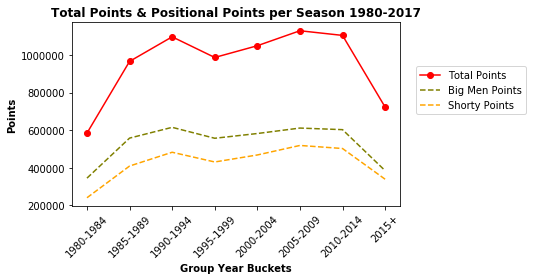

In [91]:
#made graph to show positional total scoring and then scoring by position designation
fig, ax1 = plt.subplots()

lns9 = ax1.plot(x_axis9,totalpts, marker ='o',color="red", label = "Total Points" )
lns10 = ax1.plot(x_axis10, bigmenpts,marker = '', color = "olive", linestyle = 'dashed', label = "Big Men Points")
lns11 = ax1.plot(x_axis11, shortypts, color = "orange", linestyle = 'dashed',label = "Shorty Points")
ax1.set_ylabel("Points",fontweight= "bold")
ax1.set_xlabel("Group Year Buckets",fontweight= "bold")
ax1.set_title("Total Points & Positional Points per Season 1980-2017",fontweight= "bold")
plt.xticks(rotation=45)

fig.tight_layout()
lns = lns9+lns10+lns11
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc= (1.05,.5))
plt.savefig("images/TotalPointsJohnMichals.png", dpi = 100, bbox_inches = "tight")
plt.show()

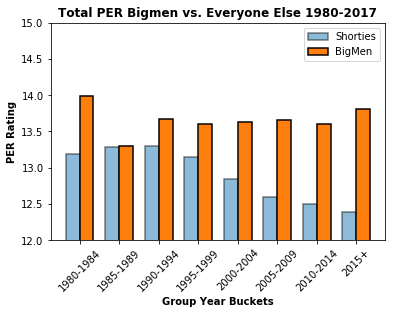

In [92]:
#made bargraph to show PER averages over the years
width = 0.35
n_groups = 8


fig,ax = plt.subplots()
index = np.arange(n_groups)
opacity = 0.5
opacity_two = 1.0

lns12 = ax.bar(index, shortyPER, width, align= 'center', edgecolor = 'black', linewidth = 1.5, alpha = opacity)
lns13 = ax.bar(index + width, bigmenPER, width, align='center', edgecolor = 'black', linewidth = 1.5, alpha = opacity_two)

ax.set_ylabel("PER Rating",fontweight= "bold")
ax.set_xlabel("Group Year Buckets",fontweight= "bold")
ax.set_ylim(12,15)
ax.set_title("Total PER Bigmen vs. Everyone Else 1980-2017",fontweight= "bold")
ax.set_xticks(index + width / 2)
ax.set_xticklabels(('1980-1984', '1985-1989', '1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014', '2015+'))
ax.legend((lns12[0], lns13[0]), ('Shorties', 'BigMen'))
plt.xticks(rotation=45)
plt.savefig("images/bigsvseveryonebarJohnMichals.png", dpi = 100, bbox_inches = "tight")
plt.show()


In [93]:
data=np.array([bigmenPER, shortyPER])
len(data[:,0])

2

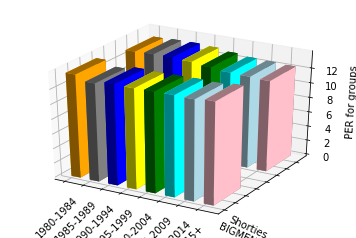

In [94]:
#tried to mess around with a 3dbar chart but ultimately, not looking that great
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

data=np.array([bigmenPER, shortyPER])

row_names = ['BIGMEN', 'Shorties']
column_names = ['1980-1984','1985-1989','1990-1994','1995-1999','2000-2004','2005-2009','2010-2014','2015+']
lx=len(data[0])
ly=len(data[:,0])

xpos = np.arange(0,lx,1)
ypos= np.arange(0,ly,1)
xpos,ypos = np.meshgrid(xpos,ypos)
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(lx*ly)

dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = data.flatten()

cs = ['orange','gray','blue', 'yellow', 'green', 'cyan','lightblue','pink']*ly

ax.bar3d(xpos,ypos,zpos,dx,dy,dz, color = cs)
ax.w_xaxis.set_ticklabels(column_names, rotation=45)
ax.w_yaxis.set_ticklabels(row_names, rotation = 335)

#ax.set_xlabel('Groups')
#ax.set_ylabel('Years')
#ax.set_zlim(10,16) cant get this to work properly
ax.set_zlabel('PER for groups')
plt.savefig('images/Weird3dbarnotworkingfullyJohnMichals.png', dpi=100, bbox_inches ="tight")
plt.show()

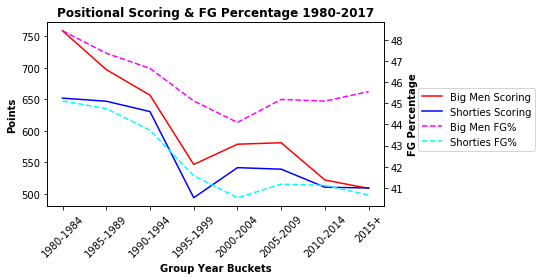

In [95]:
#made graph to show positional scoring by points and field goal percentage
fig, ax1 = plt.subplots()

lns1 = ax1.plot(x_axis1,bigmen_scoring, color="red", label = "Big Men Scoring" )
lns2 = ax1.plot(x_axis2, shorty_scoring, color = "blue", label = "Shorties Scoring")
ax1.set_ylabel("Points",fontweight= "bold")
ax1.set_xlabel("Group Year Buckets",fontweight= "bold")
ax1.set_title("Positional Scoring & FG Percentage 1980-2017",fontweight= "bold")
plt.xticks(rotation=45)

ax2 = ax1.twinx()

lns3 = ax2.plot(x_axis1, bigmen_fgpercent, color="magenta", linestyle = 'dashed', label = "Big Men FG%")
lns4 = ax2.plot(x_axis2, shorty_fgpercent, color="cyan", linestyle = 'dashed', label ="Shorties FG%")
ax2.set_ylabel("FG Percentage",fontweight= "bold")


fig.tight_layout()
lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc= (1.1,.3))
plt.savefig("images/ScoringFGPercentageJohnMichals.png", dpi = 100, bbox_inches = "tight")
plt.show()

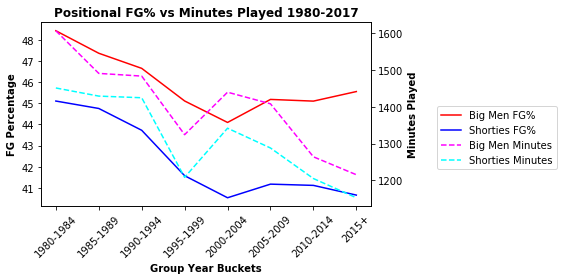

In [96]:
#made graph to show positional Field Goal Percentage and Minutes Played
fig, ax1 = plt.subplots()

lns14 = ax1.plot(x_axis1,bigmen_fgpercent, color="red", label = "Big Men FG%" )
lns15 = ax1.plot(x_axis2, shorty_fgpercent, color = "blue", label = "Shorties FG%")
ax1.set_ylabel("FG Percentage",fontweight= "bold")
ax1.set_xlabel("Group Year Buckets",fontweight= "bold")
ax1.set_title("Positional FG% vs Minutes Played 1980-2017",fontweight= "bold")
plt.xticks(rotation=45)

ax2 = ax1.twinx()

lns16 = ax2.plot(x_axis1, bigmen_minutes, color="magenta",linestyle = 'dashed', label = "Big Men Minutes")
lns17 = ax2.plot(x_axis2, shorty_minutes, color="cyan",linestyle = 'dashed', label ="Shorties Minutes")
ax2.set_ylabel("Minutes Played",fontweight= "bold")


fig.tight_layout()
lns = lns14+lns15+lns16+lns17
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc= (1.2,.2))
plt.savefig("images/PositionalFG%JohnMichals.png", dpi = 100, bbox_inches = "tight")
plt.show()

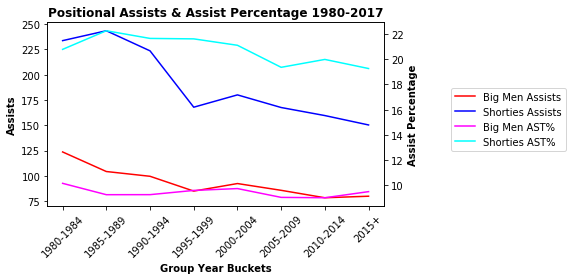

In [97]:
#made graph to show positional assists and assist percentage
fig, ax1 = plt.subplots()

lns5 = ax1.plot(x_axis6,bigmen_assist, color="red", label = "Big Men Assists" )
lns6 = ax1.plot(x_axis5, shorty_assist, color = "blue", label = "Shorties Assists")
ax1.set_ylabel("Assists",fontweight= "bold")
ax1.set_xlabel("Group Year Buckets",fontweight= "bold")
ax1.set_title("Positional Assists & Assist Percentage 1980-2017",fontweight= "bold")
plt.xticks(rotation=45)
ax2 = ax1.twinx()

lns7 = ax2.plot(x_axis8, bigmen_assistpercent, color="magenta", label = "Big Men AST%")
lns8 = ax2.plot(x_axis7, shorty_assistpercent, color="cyan", label ="Shorties AST%")
ax2.set_ylabel("Assist Percentage",fontweight= "bold")


fig.tight_layout()
lns = lns5+lns6+lns7+lns8
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs,loc= (1.2,.3))
plt.savefig("images/Positional Assists & Assist PercentageJohnMichals.png", dpi = 100, bbox_inches = "tight")
plt.show()

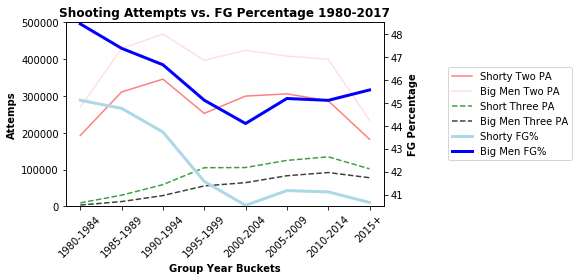

In [98]:
#made graph to show shorties pts and then 2 and 3 point attemps
fig, ax1 = plt.subplots()

lns18 = ax1.plot(x_axis6,shorty_twonew, color="red", alpha = .5, label = "Shorty Two PA" )
lns19 = ax1.plot(x_axis8,bigmen_twonew, color="pink", alpha = .5, label = "Big Men Two PA")
lns20 = ax1.plot(x_axis5, shorty_threenew, color = "green", linestyle = 'dashed', alpha = .75, label = "Short Three PA")
lns21 = ax1.plot(x_axis7, bigmen_threenew, color="black",linestyle = 'dashed',alpha = .75, label ="Big Men Three PA")
ax1.set_ylabel("Attemps",fontweight= "bold")
ax1.set_ylim(1000,500000)
ax1.set_xlabel("Group Year Buckets",fontweight= "bold")
ax1.set_title("Shooting Attempts vs. FG Percentage 1980-2017",fontweight= "bold")
plt.xticks(rotation=45)
ax2 = ax1.twinx()

lns22 = ax2.plot(x_axis8,shorty_fgpercent, color="lightblue", linewidth = 3, label = "Shorty FG%")
lns23 = ax2.plot(x_axis7, bigmen_fgpercent, color="blue", linewidth = 3, label ="Big Men FG%")
ax2.set_ylabel("FG Percentage",fontweight= "bold")
ax2.set_ylim(40.5,48.5)


fig.tight_layout()
lns = lns18+lns19+lns20+lns21+lns22+lns23
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs,loc= (1.2,.25))
plt.savefig("images/ShootingAttemptsvsFGJohnMichals.png", dpi = 100, bbox_inches = "tight")
plt.show()

In [99]:
#Added in the player data file, nba_df
nba_df.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [100]:
#NEXT FEW LINES OF CODE DROP NAs, CHANGE HEIGHT TO TOTAL INCHES, CREATE CAREER LENGTH COLUMN
nba_df = nba_df.dropna(how="any")

In [101]:
nba_df[["height","inches"]]=nba_df["height"].str.split('-',expand=True)

In [102]:
nba_df["height"] = pd.to_numeric(nba_df["height"])
nba_df["inches"] = pd.to_numeric(nba_df["inches"])

In [103]:
nba_df['height'] = nba_df['height'].apply(lambda x: x*12)
nba_df["total height"] = nba_df["height"] + nba_df["inches"]
nba_df["Career Length"]= nba_df["year_end"] - nba_df["year_start"]

In [104]:
nba_df = nba_df[["name", "Career Length", 'position', 'total height', 'weight', 'birth_date', 'college']]
nba_df.head()

,name,Career Length,position,total height,weight,birth_date,college
0,Alaa Abdelnaby,4,F-C,82,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,9,C-F,81,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,19,C,86,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,10,G,73,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,5,F,78,223.0,"November 3, 1974",San Jose State University


In [105]:
#check position
nba_df["position"].unique()

array(['F-C', 'C-F', 'C', 'G', 'F', 'F-G', 'G-F'], dtype=object)

In [106]:
#created a onlybigs variable
only_bigs = nba_df.loc[(nba_df["position"] == "C") | (nba_df["position"] =="C-F") |(nba_df["position"] =="F-C"),:]
other_than_bigs = nba_df.loc[(nba_df["position"] == "G") | (nba_df["position"] =="F-G") |(nba_df["position"] =="G-F")
                             |(nba_df["position"] =="F"),:]
other_than_bigs.head()

,name,Career Length,position,total height,weight,birth_date,college
3,Mahmoud Abdul-Rauf,10,G,73,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,5,F,78,223.0,"November 3, 1974",San Jose State University
5,Shareef Abdur-Rahim,11,F,81,225.0,"December 11, 1976",University of California
6,Tom Abernethy,4,F,79,220.0,"May 6, 1954",Indiana University
7,Forest Able,0,G,75,180.0,"July 27, 1932",Western Kentucky University


In [107]:
#created variables for regression analysis
player_height = nba_df["total height"]
career_length = nba_df["Career Length"]

In [108]:
#runs regression to determine if career length is affected by a players height
(slope, intercept, _, _, _) = stats.linregress(player_height, career_length) 
fit = slope* player_height + intercept
#print(fit)

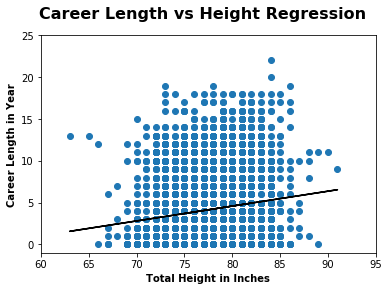

In [109]:
# Plot data
fig, ax = plt.subplots()

fig.suptitle("Career Length vs Height Regression", fontsize=16, fontweight="bold")

ax.set_xlim(60,95)
ax.set_ylim(-1,25)

ax.set_xlabel("Total Height in Inches", fontweight= "bold")
ax.set_ylabel("Career Length in Year",fontweight= "bold")

ax.plot(player_height, career_length, linewidth=0, marker='o')
ax.plot(player_height, fit, 'black')
plt.savefig("images/CareerLengthRegression.png", dpi = 100, bbox_inches = "tight")
plt.show()

In [110]:
player_height = 84
print("The expected career length for a Center with the height of " +  str(player_height) + " inches is " +
      str(slope * player_height + intercept) + ".")

The expected career length for a Center with the height of 84 inches is 5.299141601976114.


In [111]:
#Renamed for the merge, a new data frame with name not player
bigmencleanformerge_df = bigmenclean_df.rename(columns={"Player": "name"})
notbigmencleanformerge_df = shortiesclean_df.rename(columns={"Player": "name"})
notbigmencleanformerge_df.head()

,Year,name,Pos,Age,Tm,G,GS,MP,PER,TS%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year Group
5730,1980.0,Tiny Archibald*,PG,31.0,BOS,80.0,80.0,2864.0,15.3,0.574,...,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0,1980-1984
5786,1980.0,Don Chaney,SG,33.0,BOS,60.0,0.0,523.0,7.8,0.402,...,31.0,42.0,73.0,38.0,31.0,11.0,33.0,80.0,167.0,1980-1984
5835,1980.0,Chris Ford,SG,31.0,BOS,73.0,73.0,2115.0,13.0,0.537,...,77.0,104.0,181.0,215.0,111.0,27.0,105.0,178.0,816.0,1980-1984
5867,1980.0,Gerald Henderson,PG,24.0,BOS,76.0,2.0,1061.0,12.7,0.539,...,37.0,46.0,83.0,147.0,45.0,15.0,109.0,96.0,473.0,1980-1984
5949,1980.0,Pete Maravich*,SG,32.0,BOS,26.0,4.0,442.0,15.6,0.547,...,10.0,28.0,38.0,29.0,9.0,2.0,37.0,49.0,299.0,1980-1984


In [112]:
#This is fine, but height is not the only factor in terms of a career, we need to dig a little deeper
nba_merge = pd.merge(bigmencleanformerge_df, only_bigs, on="name", how="inner")
nba_otherposmerge = pd.merge(notbigmencleanformerge_df, other_than_bigs, on="name", how="inner")
nba_otherposmerge.head()

,Year,name,Pos,Age,Tm,G,GS,MP,PER,TS%,...,TOV,PF,PTS,Year Group,Career Length,position,total height,weight,birth_date,college
0,1980.0,Don Chaney,SG,33.0,BOS,60.0,0.0,523.0,7.8,0.402,...,33.0,80.0,167.0,1980-1984,11,G,77,210.0,"March 22, 1946",University of Houston
1,1980.0,Chris Ford,SG,31.0,BOS,73.0,73.0,2115.0,13.0,0.537,...,105.0,178.0,816.0,1980-1984,9,G-F,77,190.0,"January 11, 1949",Villanova University
2,1981.0,Chris Ford,SG,32.0,BOS,82.0,75.0,2723.0,8.8,0.488,...,127.0,212.0,728.0,1980-1984,9,G-F,77,190.0,"January 11, 1949",Villanova University
3,1982.0,Chris Ford,SG,33.0,BOS,76.0,53.0,1591.0,7.8,0.458,...,52.0,143.0,435.0,1980-1984,9,G-F,77,190.0,"January 11, 1949",Villanova University
4,1980.0,Gerald Henderson,PG,24.0,BOS,76.0,2.0,1061.0,12.7,0.539,...,109.0,96.0,473.0,1980-1984,12,G,74,175.0,"January 16, 1956",Virginia Commonwealth University


In [113]:
#THIS WAS DONE SO THAT I COULD SORT THE TOP PERS AND THEN USE THEM IN A BUBBLE
centerssortedPER = nba_merge.sort_values('PER', ascending = False)
otherssortedPER = nba_otherposmerge.sort_values('PER', ascending = False)
#OBPT30 = onlybigsPERtopthirty["PER"].head(30)

otherssortedPER.head()

,Year,name,Pos,Age,Tm,G,GS,MP,PER,TS%,...,TOV,PF,PTS,Year Group,Career Length,position,total height,weight,birth_date,college
2523,1995.0,Darrell Armstrong,PG,26.0,ORL,3.0,0.0,8.0,40.2,0.563,...,1.0,3.0,10.0,1995-1999,13,G,72,170.0,"June 22, 1968",Fayetteville State University
2215,1999.0,John Crotty,PG,29.0,POR,3.0,0.0,19.0,37.0,0.644,...,0.0,1.0,12.0,1995-1999,10,G,73,185.0,"July 15, 1969",University of Virginia
4067,2004.0,Chris Jefferies,SG,23.0,TOR,2.0,0.0,8.0,33.3,0.621,...,1.0,0.0,8.0,2000-2004,1,G-F,80,225.0,"February 13, 1980","California State University, Fresno"
2538,1995.0,Elmer Bennett,PG,24.0,CLE,4.0,0.0,18.0,32.5,0.588,...,3.0,3.0,15.0,1995-1999,2,G,72,170.0,"February 13, 1970",University of Notre Dame
2524,1996.0,Darrell Armstrong,PG,27.0,ORL,13.0,0.0,41.0,32.4,0.622,...,6.0,4.0,42.0,1995-1999,13,G,72,170.0,"June 22, 1968",Fayetteville State University


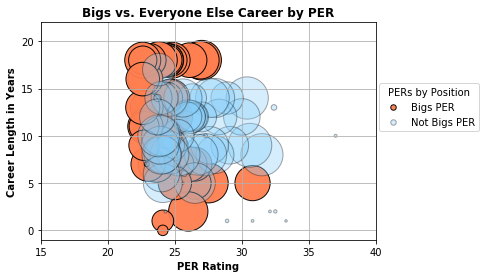

In [114]:
colors = ["coral", "lightskyblue", "gold"]
plt.scatter(centerssortedPER["PER"].head(50), centerssortedPER["Career Length"].head(50), marker="o", c="coral", edgecolors = "black", s = centerssortedPER["PTS"]*.75, label = "Bigs PER", alpha = 0.95)
plt.scatter(otherssortedPER["PER"].head(50), otherssortedPER["Career Length"].head(50), marker="o", c="lightskyblue", edgecolors = "black", s = otherssortedPER["PTS"]*.75, label = "Not Bigs PER", alpha = 0.35)
plt.grid(True)
plt.xlim(15,40)
plt.ylim(-1,22)
plt.ylabel("Career Length in Years", fontweight = "bold")
plt.xlabel("PER Rating", fontweight = "bold")
plt.title("Bigs vs. Everyone Else Career by PER", fontweight = "bold")
lgnd = plt.legend(loc =(1.01, .5),title = "PERs by Position")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
plt.savefig("images/BubbleplotPERtop50.png", dpi = 100, bbox_inches = "tight")
plt.show()

In [115]:
nba_newmerge= nba_merge.groupby("name")
nba_newotherposmerge =nba_otherposmerge.groupby("name")

In [116]:
#nba_newmerge.mean()
nba_newotherposmerge["PER"].mean().head()

name
A.J. English    11.550000
A.J. Guyton     11.050000
A.J. Price      11.871429
A.J. Wynder      7.600000
Aaron Brooks    12.900000
Name: PER, dtype: float64

In [117]:
#made new variable for the PER, will make scatter plot
onlybigsPER = nba_newmerge["PER"].mean()
onlybigsPTS = nba_newmerge["PTS"].mean()
onlybigscareer = nba_newmerge["Career Length"].count()
onlybigsage = nba_newmerge["Age"].mean() 
notbigsPER = nba_newotherposmerge["PER"].mean()
notbigsPTS = nba_newotherposmerge["PTS"].mean()
notbigscareer = nba_newotherposmerge["Career Length"].count()
notbigsage = nba_newotherposmerge["Age"].mean()
onlybigsPERtoptwenty = nba_newmerge["PER"].mean().head(20)

In [118]:
#SORTED WITH THE APPLY METHOD, KEPT THE APPLY IN PLACE BECAUSE THE CODE IS GOOD.  DIDNT PRODUCE THE RESULT I WANTED THOUGH
#onlybigsPERtoptwenty = nba_newmerge.apply(pd.DataFrame.sort_values, 'PER', ascending = False)
#onlybigsPERtoptwenty.head(5)

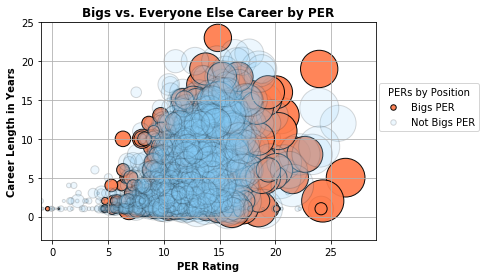

In [119]:
colors = ["coral", "lightskyblue", "gold"]
plt.scatter(onlybigsPER, onlybigscareer, marker="o", c="coral", edgecolors = "black", s = onlybigsPTS, label = "Bigs PER", alpha = 0.95)
plt.scatter(notbigsPER, notbigscareer, marker="o", c="lightskyblue", edgecolors = "black", s = notbigsPTS, label = "Not Bigs PER", alpha = 0.15)
plt.grid(True)
plt.xlim(-1,29)
plt.ylim(-3,25)
plt.ylabel("Career Length in Years", fontweight = "bold")
plt.xlabel("PER Rating", fontweight = "bold")
plt.title("Bigs vs. Everyone Else Career by PER", fontweight = "bold")
lgnd = plt.legend(loc =(1.01, .5),title = "PERs by Position")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
plt.savefig("images/BubbleplotPER.png", dpi = 100, bbox_inches = "tight")
plt.show()